In [33]:
import  pandas as pd

df = pd.read_excel('data.xlsx', header=1)

# df.apply(lambda x: df['x'] =  x.split(',')[0])
coords = df['MNI Coordinates (X, Y, Z)'].str.split(',', 2, expand=True)
coords.columns=['x','y','z']
coords = coords.astype({'x': 'int', 'y': 'int', 'z': 'int'})

df = pd.concat([df,coords], axis=1)
df

R OI Label*      Module                            Location#  ROI ID#  \
0             1   SN module                 L A8m, medial area 8        1   
1             2   SN module                 R A8m, medial area 8        2   
2             3   SN module                 L A6m, medial area 6        9   
3             4   SN module               R A45c, caudal area 45       34   
4             5   SN module              R A45r, rostral area 45       36   
..          ...         ...                                  ...      ...   
57           58  CEN module                L A5l, lateral area 5      129   
58           59  CEN module   L A7ip, intraparietal area 7(hIP3)      133   
59           60  CEN module  L A39rd, rostrodorsal area 39(Hip3)      137   
60           61  CEN module   L A40rd, rostrodorsal area 40(PFt)      139   
61           62  CEN module                         L A2, area 2      159   

   MNI Coordinates (X, Y, Z)  Cluster Size  \
0                -5 ,15, 54           1537   
1                 7, 16, 54           1099   
2                -6, -5, 58            161   
3                54, 24, 12            440   
4                51, 36, -1            104   
..                       ...           ...   
57             -33, -47, 50            665   
58             -27, -59, 54            407   
59             -38, -61, 46            391   
60             -51, -33, 42            643   
61             -46, -30, 50            159   

   Involvement in each domain: relative (absolute)  \
0                                     17.13 (2.46)   
1                                     13.71 (1.23)   
2                                            0 (0)   
3                                            0 (0)   
4                                            0 (0)   
..                                             ...   
57                                           0 (0)   
58                                           0 (0)   
59                                           0 (0)   
60                                           0 (0)   
61                                           0 (0)   

   positive social interaction vs. negative /baseline  \
0                                               0 (0)   
1                                               0 (0)   
2                                               0 (0)   
3                                               0 (0)   
4                                               0 (0)   
..                                                ...   
57                                              0 (0)   
58                                              0 (0)   
59                                              0 (0)   
60                                              0 (0)   
61                                              0 (0)   

   negative social interaction vs. positive /baseline prediction error  \
0                                        72.54 (8.71)            0 (0)   
1                                        76.61 (5.75)            0 (0)   
2                                               0 (0)            0 (0)   
3                                               0 (0)      8.42 (1.11)   
4                                               0 (0)            0 (0)   
..                                                ...              ...   
57                                              0 (0)            0 (0)   
58                                              0 (0)            0 (0)   
59                                              0 (0)            0 (0)   
60                                              0 (0)            0 (0)   
61                                              0 (0)            0 (0)   

   norm alignment vs. norm violation/baseline  \
0                                       0 (0)   
1                                       0 (0)   
2                                       0 (0)   
3                                       0 (0)   
4                                       0 (0)   
..       

Farbzuoordnung setzen. Evtl. hier __noch__ schönere Farben auswählen. 

In [49]:
df['color'] = df['Module'].map(
    {'SN module': 'red', 
     'SCN module': 'cyan',
     'DMN module': 'blue',
     'CEN module': 'green', }
    , )

In [50]:
from nilearn import plotting  

view = plotting.view_markers(df[['x','y','z']].values, df['color'].to_list(), marker_size=8) 
view

# Todo

- DIe Punkte als Glass-Brain darstellen (besser: plot_connectome)
- die 3D-Ansicht der Connectivität darstellen



ValueError: 'adjacency_matrix' is supposed to have shape (n, n). Its shape was (62, 3)

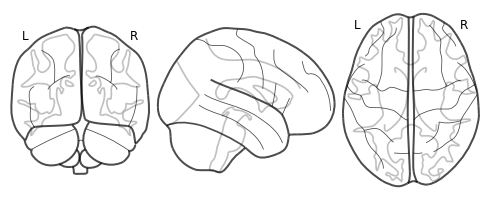

In [52]:
plotting.plot_connectome(df[['x','y','z']].values, df['color'].to_list()) 
#view2 = plotting.plot_glass_brain(dmn_coords, threshold=3)
#view2